<a href="https://colab.research.google.com/github/pmargarete/CCDEPLRL_EXERCISES_COM222/blob/main/Exercise4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 4


## Instructions


1. Collect **100-200 images** of the fruit
2. Split the collected images for train, test and validation. Please make sure that there are no duplicate images. Images that are used in train should not appear in test, validation and vice versa.
3. Combine the collected images together with the images of apple, orange and banana. They  are already available in the link below: https://github.com/robitussin/tensorflow_lite_projects/tree/main/images/fruits
4. Create and train a Convolutional Neural Network (CNN).
5. Save the model as **"model.tflite"**
6. Create a folder named **exercise_4** in your **CCDEPLRL_EXERCISES_COM222_ML** repository.
7. Upload the **python notebook (.ipynb)** and the **model (.tflite)** in the exercise_3 folder

Deadline of submission is on **April 22, 2025**

## Model

In [130]:
!wget https://bitbucket.org/ishaanjav/code-and-deploy-custom-tensorflow-lite-model/raw/a4febbfee178324b2083e322cdead7465d6fdf95/fruits.zip

--2025-04-22 08:37:11--  https://bitbucket.org/ishaanjav/code-and-deploy-custom-tensorflow-lite-model/raw/a4febbfee178324b2083e322cdead7465d6fdf95/fruits.zip
Resolving bitbucket.org (bitbucket.org)... 104.192.142.25, 104.192.142.24, 104.192.142.26, ...
Connecting to bitbucket.org (bitbucket.org)|104.192.142.25|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 105946856 (101M) [application/zip]
Saving to: ‘fruits.zip.1’

fruits.zip.1        100%[===================>] 101.04M  17.1MB/s    in 6.0s    

2025-04-22 08:37:20 (16.9 MB/s) - ‘fruits.zip.1’ saved [105946856/105946856]



In [131]:
#!unzip fruits.zip

Archive:  fruits.zip
replace __MACOSX/._fruits? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

Import the libraries

In [133]:
import tensorflow as tf
import matplotlib.pyplot as plt

Hyperparameters: Set the image size and batch size

In [134]:
img_height, img_width = 32, 32
batch_size = 20

Split the images into train, validation and test

In [135]:
import os
import shutil
from PIL import Image

for filename in os.listdir('fruits'):
    if os.path.isfile(os.path.join('fruits', filename)) and not filename.startswith('.'):
        try:
            img = Image.open(os.path.join('fruits', filename))
            rgb_img = img.convert('RGB')
            rgb_img.save(os.path.join('fruits', filename[:-4] + '.jpg'), 'JPEG')
            os.remove(os.path.join('fruits', filename))  # Remove the original file
        except Exception as e:
            if 'cannot identify image file' in str(e):
                print(f"Skipping non-image file: {filename}")
            else:
                raise e  # Re-raise other exceptions

In [136]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    "fruits/train",
    image_size = (img_height, img_width),
    batch_size = batch_size
)
val_ds = tf.keras.utils.image_dataset_from_directory(
    "fruits/validation",
    image_size = (img_height, img_width),
    batch_size = batch_size
)
test_ds = tf.keras.utils.image_dataset_from_directory(
    "fruits/test",
    image_size = (img_height, img_width),
    batch_size = batch_size
)

Found 531 files belonging to 4 classes.
Found 84 files belonging to 4 classes.
Found 137 files belonging to 4 classes.


Display sample images from the dataset

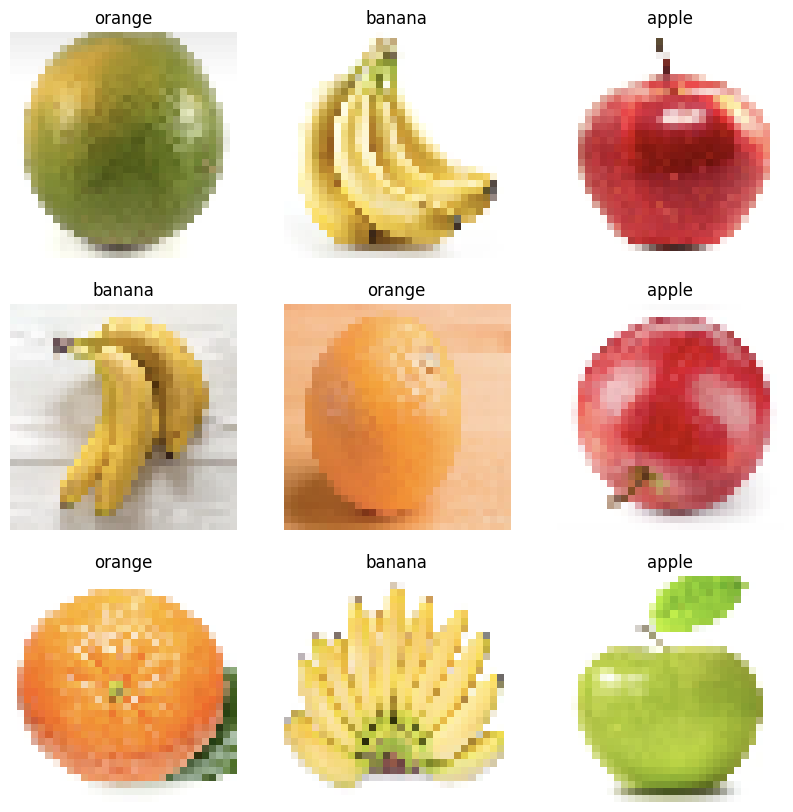

In [143]:
class_names = ["apple", "banana", "orange", "sweetpotato"]
plt.figure(figsize=(10,10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

Create the Convolutional Neural Network Model (CNN)

In [144]:
data_augmentation = tf.keras.Sequential(
  [
    tf.keras.layers.RandomFlip("horizontal",
                                 input_shape=(img_height,
                                              img_width,
                                              3)),
    tf.keras.layers.RandomRotation(0.1),
    tf.keras.layers.RandomZoom(0.1),
  ]
)

In [145]:
model = tf.keras.Sequential(
    [
     data_augmentation,
     tf.keras.layers.Rescaling(1./255),
     tf.keras.layers.Conv2D(32, 3, activation="relu"),
     tf.keras.layers.MaxPooling2D(),
     tf.keras.layers.Conv2D(32, 3, activation="relu"),
     tf.keras.layers.MaxPooling2D(),
     tf.keras.layers.Conv2D(32, 3, activation="relu"),
     tf.keras.layers.MaxPooling2D(),
     tf.keras.layers.Dropout(0.2),
     tf.keras.layers.Flatten(),
     tf.keras.layers.Dense(128, activation="relu"),
     tf.keras.layers.Dense(4)
    ]
)


In [146]:

model.summary()

Model: "sequential_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_19 (Sequential)      │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_13 (Rescaling)        │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_36 (Conv2D)              │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_36 (MaxPooling2D) │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_37 (Conv2D)              │ (None, 13, 13, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_37 (MaxPooling2D) │ (None, 6, 6, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_38 (Conv2D)              │ (None, 4, 4, 32)       │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_38 (MaxPooling2D) │ (None, 2, 2, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 2, 2, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_18 (Flatten)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 36,420 (142.27 KB)

 Trainable params: 36,420 (142.27 KB)

 Non-trainable params: 0 (0.00 B)

Define the optimizer and loss function

In [147]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),  # Reduced learning rate
    loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

Train the model

In [183]:
model.fit(
    train_ds,
    validation_data = val_ds,
    epochs = 14
)

Epoch 1/14
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - accuracy: 0.9894 - loss: 0.0416 - val_accuracy: 0.9762 - val_loss: 0.1106
Epoch 2/14
27/27 ━━━━━━━━━━━━━━━━━━━━ 4s 98ms/step - accuracy: 0.9975 - loss: 0.0183 - val_accuracy: 0.9762 - val_loss: 0.1526
Epoch 3/14
27/27 ━━━━━━━━━━━━━━━━━━━━ 4s 64ms/step - accuracy: 0.9898 - loss: 0.0264 - val_accuracy: 0.9524 - val_loss: 0.2207
Epoch 4/14
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - accuracy: 0.9920 - loss: 0.0218 - val_accuracy: 0.9643 - val_loss: 0.1492
Epoch 5/14
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - accuracy: 0.9948 - loss: 0.0135 - val_accuracy: 0.9643 - val_loss: 0.1300
Epoch 6/14
27/27 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step - accuracy: 0.9953 - loss: 0.0189 - val_accuracy: 0.9524 - val_loss: 0.1926
Epoch 7/14
27/27 ━━━━━━━━━━━━━━━━━━━━ 3s 75ms/step - accuracy: 0.9963 - loss: 0.0196 - val_accuracy: 0.9762 - val_loss: 0.1340
Epoch 8/14
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - accuracy: 0.9887 - loss: 0.0312 - val_accuracy: 0.9762 - v

Test the model

In [184]:
model.evaluate(test_ds)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.9878 - loss: 0.0438


[0.101638562977314, 0.970802903175354]

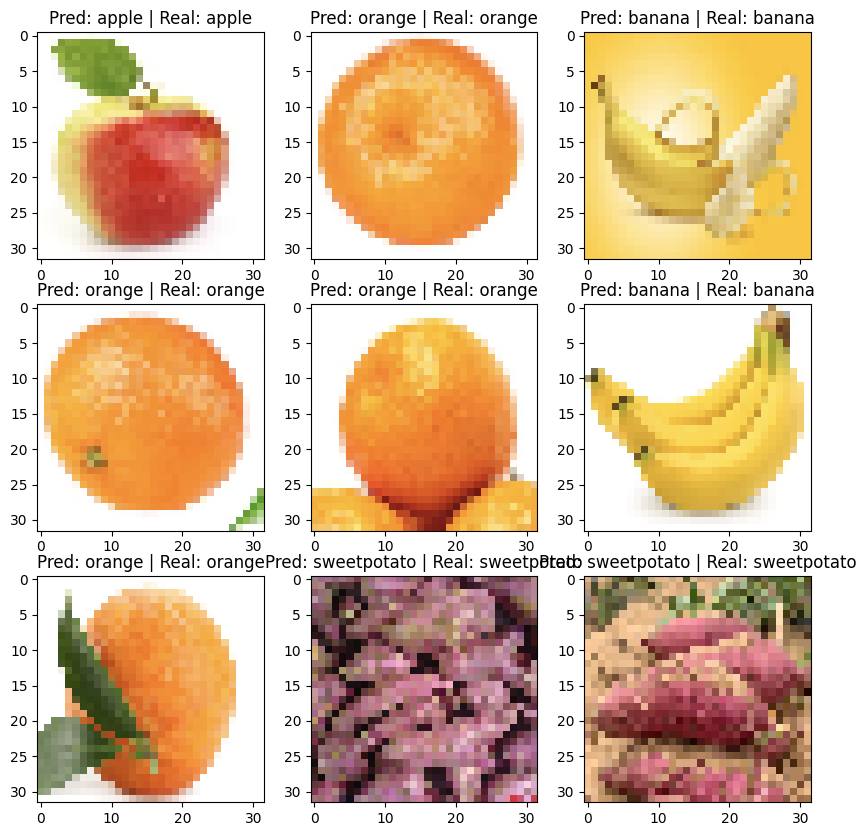

In [189]:
import numpy

plt.figure(figsize=(10,10))
for images, labels in test_ds.take(1):
  classifications = model(images)
  # print(classifications)

  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    index = numpy.argmax(classifications[i])
    plt.title("Pred: " + class_names[index] + " | Real: " + class_names[labels[i]])

Save the model

In [190]:
model.save('Fruits.keras')